<a href="https://colab.research.google.com/github/njaincode/PDA_portfolio/blob/main/Performing_statistical_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Measuring central tendencies (min, max, mean, standard deviation etc.)


> The calculate_stat() below calculates the basic stats using describe() function.
The stats are calculated on income, population and age.



Average age for 'CA'
------------------------
             Age     Income        Pop
count   3.000000   3.000000   3.000000
mean   33.000000  66.333333  31.333333
std     3.464102  12.013881  22.030282
min    29.000000  54.000000  10.000000
25%    32.000000  60.500000  20.000000
50%    35.000000  67.000000  30.000000
75%    35.000000  72.500000  42.000000
max    35.000000  78.000000  54.000000

Average age for 'IN'
------------------------
             Age     Income        Pop
count   3.000000   3.000000   3.000000
mean   38.000000  46.333333  17.333333
std     5.196152  19.629909  10.692677
min    32.000000  35.000000   5.000000
25%    36.500000  35.000000  14.000000
50%    41.000000  35.000000  23.000000
75%    41.000000  52.000000  23.500000
max    41.000000  69.000000  24.000000

Average age for 'MD'
------------------------
             Age     Income        Pop
count  13.000000  13.000000  13.000000
mean   28.076923  64.230769  44.384615
std     5.203549  16.931991  30.845147
mi

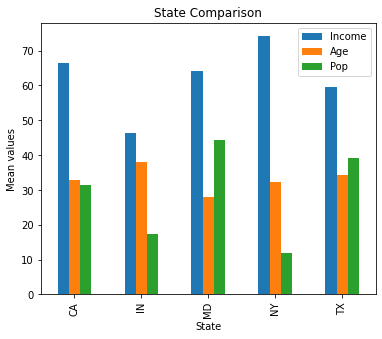

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

def clean_state(df):
  # convert the values in the Pop column to numbers of 1000s from actual numbers (rounded)
  df['Pop'] = (df['Pop']/1000).round()
  # convert the values in the 'Pop' column to int64
  df['Pop'] = df['Pop'].astype(int)
  return df

def clean_county(df):
  # Add a new column called 'Pop' to the county_level_df dataframe
  df['Pop'] = df['Population']
  # Drop the 'Population' column 
  df.drop('Population', axis=1, inplace=True)
  return df

def get_income_df():
  excel_url = 'https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/Income-Data.xlsx?raw=true'
  
  # 1. Read the three sheets into the dataframes
  county_level_df = pd.read_excel(excel_url, sheet_name='county-level')
  state_level_df = pd.read_excel(excel_url, sheet_name='state-level')
  income_new_df = pd.read_excel(excel_url, sheet_name='income')

  # 2. Cleanup Population column
  clean_county(county_level_df)
  
  # 3. Cleanup Pop column
  clean_state(state_level_df)

  # 4. Combine two df
  df_to_concat = [county_level_df, state_level_df]
  county_state_combined_df = pd.concat(df_to_concat, ignore_index=True, join='inner')
  
  # 5. Append income_df to the combined dataframe
  income_df = county_state_combined_df.append(income_new_df, ignore_index=True)
  return income_df

def calculate_stat():
  # 1. Run the function get_income_df() and store the result in a new dataframe called income_df.
  income_df = get_income_df()

  # 2. Group income_df by State and calculate some statistics on the groups.
  # Now the index will be state names
  df_groupby_state = income_df.groupby('State')

  # To get an overview of stats per state
  for state, frame in df_groupby_state:
    print(f"Average age for {state!r}")
    print("------------------------")
    print(frame.describe(), end="\n\n")

  df_groupby_state[['Income', 'Age', 'Pop']].mean().plot(kind='bar', title='State Comparison', ylabel='Mean values', xlabel='State', figsize=(6, 5))
  plt.show()

    
calculate_stat()


# Normal distribution

## Gaussian data distribution

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

def visual_check_for_gaussian_distribution():
  csv_url = 'https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true'
  
  #1. Read the csv into a data frame
  psych_data = pd.read_csv(csv_url)

  # 2. Check the data 
  print(psych_data.info())
  if (psych_data.isna().values.any()) :
    print(f'There are undefined values in dataset')
    print(psych_data.columns[psych_data.isna().any()].tolist())
    # Could have dropped NA values

  #3. Check the distribution for Resilliance
  df_r = psych_data['Resilliance']
  # Just to see some values
  print(df_r.head(10))

  # Plot histogram  
  plt.hist(df_r, color='red', label='Resilliance')
  plt.title('Resilliance histogram')
  plt.xlabel('Resilliance score')
  plt.ylabel('Frequency')
  plt.show()

  # Probability plot
  # If dots follow the line, the data is normally distributed
  stats.probplot(df_r, plot=plt)
  plt.show()

  
visual_check_for_gaussian_distribution()

## Non-Gaussian data distribution

There are undefined values in dataset
['national_voteshare_3rd_lo', 'national_turnout', 'national_turnout_hi', 'national_turnout_lo']
158044784.0
141000000.0


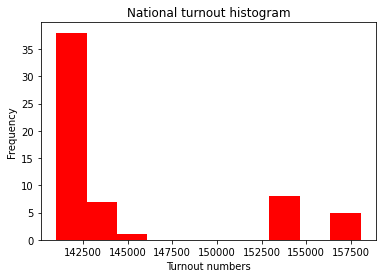

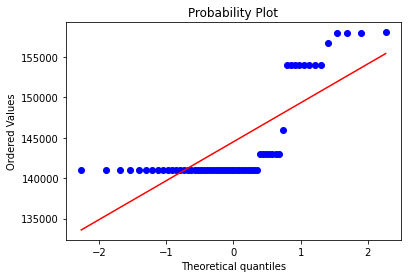

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

def visual_check_for_non_gaussian_distribution():
  csv_url = 'https://raw.githubusercontent.com/futureCodersSE/working-with-data/main/Data%20sets/Data%20Cleaning%20Data%20Sets/presDirty.csv?raw=true'
  
  #1. Read the csv into a data frame
  df = pd.read_csv(csv_url)

  key_value = 'national_turnout'

  # 2. Check the data 
  #print(df.info())
  if (df.isna().values.any()) :
    print(f'There are undefined values in dataset')
    print(df.columns[df.isna().any()].tolist())
    # Only remove undefined values from 'national_turnout' col.
    # If all NA are dropped, there is no data left in national_turnout.
    df.dropna(subset=[key_value], inplace=True)
    
  #3. Get national_turnout column
  df_t = df[key_value]
  #print(df_t.head(10))

  # Normalise, first see min and max values
  print(df_t.max())
  print(df_t.min())
  df_t = df_t/1000

  # Histogram plot  
  plt.hist(df_t, color='red')
  plt.title('National turnout histogram')
  plt.xlabel('Turnout numbers')
  plt.ylabel('Frequency')
  plt.show()

  # Probability plot
  # The dots dont fall on the line
  stats.probplot(df_t, plot=plt)
  plt.show()
  
  
visual_check_for_non_gaussian_distribution()

# Linear regression

## Linear regression on normal data


> Perform a linear regression (stats.linregress) to find a line of best fit between Resilliance (x) and selfesteem (y)



Index(['Age', 'English', 'firstlanguage', 'sex', 'origin', 'Ukresidence',
       'MAAS', 'Resilliance', 'Wellbeing', 'Stress', 'selfesteem', 'LoC',
       'sleep', 'Year'],
      dtype='object')


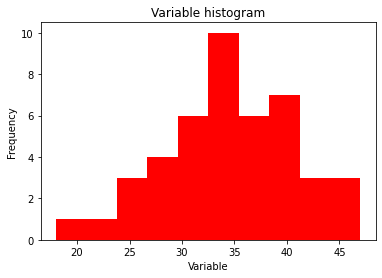

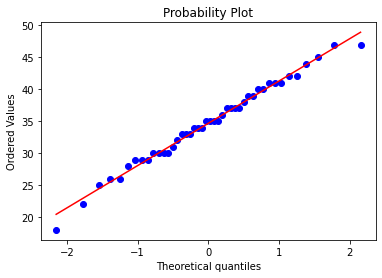

LinregressResult(slope=0.5064300541744722, intercept=1.4588122120398985, rvalue=0.5913281212034439, pvalue=2.3709886829858514e-05, stderr=0.10656964988997152)
R-squared: 0.349669


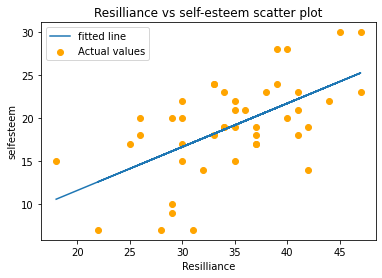

In [5]:
import pandas as pd
from scipy import stats
from scipy.stats import linregress as lr

def check_dist(ds):
# Histogram plot  
  plt.hist(ds, color='red')
  plt.title('Variable histogram')
  plt.xlabel('Variable')
  plt.ylabel('Frequency')
  plt.show()

  # Probability plot
  stats.probplot(ds, plot=plt)
  plt.show()

def regress_psychology():
  csv_url = 'https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true'
  
  # read csv
  psycho_df = pd.read_csv(csv_url)
  print(psycho_df.columns)

  # Linear regression b/w Resilliance (x) and selfesteem (y)
  # The goal is to produce a model that represents the ‘best fit’ to some observed data, according to an evaluation criterion we choose.
  # rvalue - the correlation coefficient - this indicates how closely the line drawn from the linear regression data fits the actual data, the closer to 1 the better the fit
  # pvalue - the probability of error if the regression line is extended to predict

  # x - independent variable, y - dependent variable
  x_key = 'Resilliance'
  y_key = 'selfesteem'
  x = psycho_df[x_key]
  y = psycho_df[y_key]

  # Check the distribution of x visually, good if its normally distributed
  check_dist(x)

  # Plot the data
  plt.scatter(x, y, color='orange', label='Actual values')
  plt.title('Resilliance vs self-esteem scatter plot')
  plt.xlabel(x_key)
  plt.ylabel(y_key)
  # If show() is called here, below plot will be a new plot in new figure
  #plt.show()

  # Line of best fit
  regression = lr(x, y)
  print(regression)
  print(f"R-squared: {regression.rvalue**2:.6f}")

  slope = regression.slope
  intercept = regression.intercept
  # y^ = b0 + b1x -> b1=slope, b0=intercept
  # y^ is the estimated value, y- -> mean value, y-> actual value
  # R2 -> sum(y^ - y-)^2/ sum(y - y-)^2
  # R2=1 -> estimated value == actual value -> perfect fit
  plt.plot(x, slope*x + intercept, label='fitted line')
  plt.legend()
  plt.show()


regress_psychology()